### Globe Example:
You toss a small globe in the air, when you catch it you randomly place your index finger on it. You record if your finger landed on land (L) or water (W). Your results are:

W L W W W L W L W

**Bayesian design loops**
1) Data story: narrate how the data might arrise
2) Update: feed model data
3) Evaluate: decide if it needs revision

**Data story**:
- true proportion of water covering globe is *p*
- toss of globe has probability of *p* of producing W, and a probability of *1-p* of producing L
- each globe toss is independent

### 1) Likelihood - the mathematical formula that specifies the plausibility of the data

In [1]:
import scipy.stats as ss
import numpy as np

In [2]:
# six heads on nine tosses with 0.5 chance of L
w, n, p = 6, 9, 0.5
prob = ss.binom.pmf(w, n, p)
print(prob)

0.16406250000000006


In [3]:
w, n, p = 6, 9, 0.67
prob = ss.binom.pmf(w, n, p)
print(prob)

0.27306744192061744


This is the **likelihood**. The job of the likelihood is to tell us the relative number of ways to see the data *w* given values for *p* and *n*

As sample size increases, likelihood matters more and more.

### 2) Parameters

for likelihood functions, there are adjustable inputs - these are the parameters. One or all of these may be quantities that we wish to estimate from data.

For our binomial distribution we have *p* (the probability of seeing W), *n* (sample size) and *w* (number of times water was seen). Here we are trying to learn *p* as we believe we have recorded *w* and *n* without error.

In statistical modeling, most of the questions we ask are answered directly by parameters:
- what is the avg difference between treatment group?
- how strong is the association beteween a treatment and an outcome?
- how much variation is there among groups?

### 3) Prior
for every parameter we want our Bayesian models to estimate, we must provide a **prior** (initial plausability)
previous estimates can become future priors.

Pr(p) = 1 / (1-0) = 1      every probability distribution must sum up to 1

Priors are engineering assumptions. We generally want to avoid flat priors and want weakly informative priors. Priors are useful for constraining parameters to reasonable ranges as well as for expressing any knowledge we have about the parameter before any data is observed. 

For example, we know that p being 0 or 1 are completely implausible.

If you dont have a strong argument for any particular prior, try different ones. Ultimately a prior is an assumption.

### 4) Posterior

Once you have chosen a likelihood, which parameters are to be estimated, and a prior for each parameter, a Bayesian model treats the estimates as a purely logical consequence of those assumptions.

For every unique combination of data, likelihood, parameters and prior, there is a unique set of estimates. The resulting estimates - the relative plausbility of different parameters values, condtional on the data - are known as the **Posterior Distribution**.

This is through Bayes Theorem.

Pr(w, p) = Pr(w|p)Pr(p)

probability of w and p is the product of the likelihood of Pr(w|p) and the prior probability Pr(p). for example probability of rain and cold is equal to probability of rain, when its cold, times the probability of cold.

Posterior = (Likelihood x Prior) / Average Likelihood

Three main ways for computing Posterior Distrbutions.
1. Grid Approximation
2. Quadratic Approximation
3. Markov chain Monte Carlo (MCMC)

### Grid Approximation
While most parameters are continunous, we can achieve a good approximation of continuous posterior distribution by only considering a finite grid of paramter values. For different values of p', we multiply the prior probability of p' by the likelihood at p'. 

Pros:
- easy

Cons:
- scales poorly as number of parameter increases

Recipe:
1. define the grid (# of points, list of parameter values)
2. Compute value of prior at each paramter value on the grid
3. Compute likelihood at each parameter value
4. Compute unstandardized posterior at each paramter value, multiplying the prior by likelihood
5. standardize posterior by dividing each value by the sum of all values

In [10]:
### define grid
p_grid = np.linspace(0, 1, 20)
#print(p_grid)

### define prior
prior = np.repeat(1, 20)
#print(prior)

### likelihood at each value in grid
likelihood = ss.binom.pmf(6, 9, p=p_grid)
#print(likelihood)

### compute product of likelihood and prior
unstd_posterior = likelihood * prior

### standardize posterior
posterior = unstd_posterior / sum(unstd_posterior)

In [11]:
import matplotlib.pyplot as plt

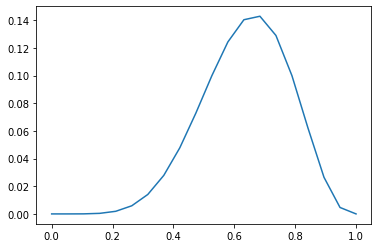

In [12]:
plt.plot(p_grid, posterior)

In [35]:
def binom_grid_approximation(p_grid_size, w, n, prior=None):
    ### define grid
    p_grid = np.linspace(0, 1, p_grid_size)

    ### define prior
    if not prior:
        prior = np.repeat(1, p_grid_size)
    else:
        prior = prior

    ### likelihood at each value in grid
    likelihood = ss.binom.pmf(w, n, p=p_grid)

    ### compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    ### standardize posterior
    posterior = unstd_posterior / sum(unstd_posterior)

    plt.plot(p_grid, posterior)

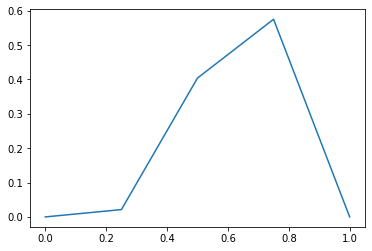

In [24]:
### only 5 grid points
binom_grid_approximation(5)

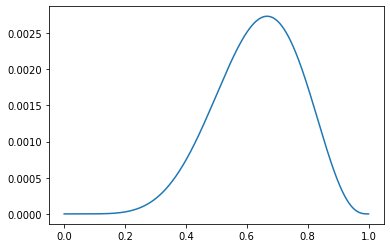

In [25]:
### 1000 grid points
binom_grid_approximation(1000)

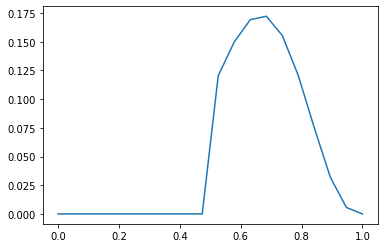

In [28]:
prior = [0 if x < 0.5 else 1 for x in p_grid]
binom_grid_approximation(20, prior)

### Quadratic Approximation

If you have one parameter with 100 values in the grid that is a 100^1 calculation. with two that is 100^2. This can get huge with lots of parameters for grid approximation.

Instead we can use **quadratic approximation**. Under general condtions, region near the peak of the posterior distribution will be nearly Gaussian or "normal" - therefore we can use a Gaussian distribution. THis is useful because it can be described by two numbers - its mean (middle) and variance (spread).

Its called a gaussian distribbution bc the log of a Gauss distribution is a parabola. And a parabola is a quadratic function. So this is a log-posterior with a parabola.

1. Find posterior mode (algorithm climbs the distribution, looks for "peak")
2. Once at peak, estimate curvature.

### Grid Approximation
1. W W W
2. W W W L
3. L W W L W W W 

In [17]:
def plot_posterior_grid_approx(w, n):
    ### define grid
    p_grid = np.linspace(0, 1, 20)

    ### define prior
    prior = np.repeat(1, 20)

    ### likelihood at each value in grid
    likelihood = ss.binom.pmf(w, n, p=p_grid)

    ### compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    ### standardize posterior
    posterior = unstd_posterior / sum(unstd_posterior)

    # plot
    plt.plot(p_grid, posterior)

None

None

None

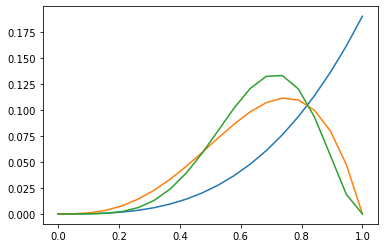

In [18]:
###  W W W 
display(plot_posterior_grid_approx(3, 3))

display(plot_posterior_grid_approx(3, 4))

display(plot_posterior_grid_approx(5, 7))

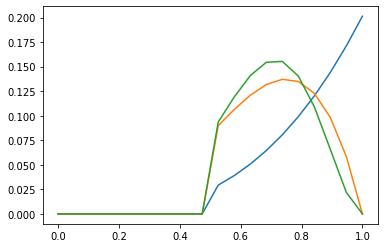

In [41]:
prior = [0 if x < 0.5 else 1 for x in p_grid]
binom_grid_approximation(20, 3, 3, prior)
binom_grid_approximation(20, 3, 4, prior)
binom_grid_approximation(20, 5, 7, prior)

### plaus of parameter being true under 0.5 is 0 due to prior

### 4. Calculate prob of Earth given Land If:
Pr(L|E) = 0.3 
Pr(L|M) = 1.0
Pr(E) = 0.5
Pr(M) = 0.5

Pr(E|L) = Pr(L|E)Pr(E) / (Pr(L|E)Pr(E) + Pr(L|M)Pr(M)) 

==

Pr(E|L) = (0.3 * 0.5) / ((0.3 * 0.5) + (1.0 * 0.5))

In [40]:
(0.3 * 0.5) / ((0.3 * 0.5) + (1 * 0.5))

0.23076923076923075

### 2H1

In [43]:
.1 * 0.5 + 0.2 * 0.5

0.15000000000000002

In [44]:
(0.1 * 0.5 ) / 0.15

0.33333333333333337

In [45]:
(0.2 * 0.5) / 0.15

0.6666666666666667

In [47]:
0.1 * 0.33 + 0.2 * 0.667

0.16640000000000002

In [48]:
(0.1 * 0.5) / 0.15

0.33333333333333337

In [49]:
(0.9 * 0.33) + (0.8 * 0.67)

0.8330000000000001

In [50]:
(.9 * 0.33) / 0.83

0.3578313253012049

In [52]:
(0.8 * 0.36) + (0.65 * 0.64)

0.704

In [53]:
(0.8 * 0.36) / 0.704

0.40909090909090906